# <font color = lightcoral> Extending Agents 3 with Timeseries Data
>    
##### <font color = red> Testing High Precision Model --> 20240712_Transformers_Non_Overlapping_run_143_of_180.pt

**20240715_flask_app_model_change_v1.00.py**

> From transformer models
>

# <font color = red> Template Creation

## <font color = grey> Admin

In [1]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
import time
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

import warnings
warnings.simplefilter("ignore")


Base directory set to: /home/sagemaker-user


---

# <font color = lightsteelblue> 5 Key Files

In [2]:
# import pandas as pd
# import numpy as np
# import time

# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'

# # ################################## Part 1: Parsed Raw File ###################################

# # print("\n" + "*"*100)
# # print("********************** Part 1: Parsed Raw File ******************************************")
# # print("*"*100 + "\n")

# # parsed_file =  f"{data_dir}/01.BGL.log_structured.csv"
# # parsed_file_df = pd.read_csv(parsed_file)
# # display(parsed_file_df.head())
# # print("Shape of Parsed Raw File:", parsed_file_df.shape)

# ######################### Part 2: Encoded File with Feature for Model Training ######################

# print("\n" + "*"*100)
# print("********************** Part 2: Input Data with Features ******************************************")
# print("*"*100 + "\n")

# encoded_feature_input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
# encoded_feature_input_file_df = pd.read_parquet(encoded_feature_input_file)
# display(encoded_feature_input_file_df.iloc[:, :25].head())
# print("Shape of Encoded File with Features:", encoded_feature_input_file_df.shape)

# ######################### Part 3: Orig Parquet File with 20 Event Columns (Most and Least used) Only for Mapping ######################

# print("\n" + "*"*100)
# print("********************** Part 3:  Orig Parquet File with 20 Event Columns (Most and Least used) Only for Mapping ******************************************")
# print("*"*100 + "\n")

# import pandas as pd

# # data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'
# # Load the latest file
# latest_file = f"{data_dir}/03B.20240716_072206_orig_parquet_mapper_agents.parquet"
# latest_df = pd.read_parquet(latest_file)

# # Display the head of the final dataframe
# display(latest_df.head())
# display(latest_df.tail())

# print("Shape of File:", latest_df.shape)

# # ######################### Part 4: Encoded File where Train_Test = Test HEAD ###############################

# # print("\n" + "*"*100)
# # print("********************** Part 4: Test Set - HEAD *******************************")
# # print("*"*100 + "\n")

# # encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
# # display(encoded_feature_input_test_df.iloc[:, :25].head(10))
# # print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)


# # ######################### Part 5: Encoded File where Train_Test = Test MIDDLE ###############################

# # # Part 4: Encoded File where Train_Test = Test (Records 100-200)
# # print("\n" + "*"*100)
# # print("********************** Part 5: Test Set - Records 100-200 *******************************")
# # print("*"*100 + "\n")


# # encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
# # display(encoded_feature_input_test_df.iloc[100:110, :25])
# # print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)

# # ######################### Part 6: Encoded File where Train_Test = Test TAIL ###############################

# # print("\n" + "*"*100)
# # print("********************** Part 6: Test Set - TAIL *******************************")
# # print("*"*100 + "\n")

# # encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
# # display(encoded_feature_input_test_df.iloc[:, :25].tail(10))
# # print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)


# # ######################### Part 7: Event_ID to Template Mapping #######################################

# # print("\n" + "*"*100)
# # print("********************** Part 7: Event_ID to Template Mapping ******************************************")
# # print("*"*100 + "\n")

# # eventid_template_file = f"{data_dir}/04.20240711_Template_to_EventID_Mapping_v1.00.csv"
# # eventid_template_df = pd.read_csv(eventid_template_file)
# # display(eventid_template_df.head())
# # print("Shape of Event_ID to Template Mapping:", eventid_template_df.shape)

# # ######################### Part 8: Event_ID to Encoding Mapping #######################################

# # print("\n" + "*"*100)
# # print("********************** Part 8: Event_ID to Encoding Mapping ******************************************")
# # print("*"*100 + "\n")

# # eventid_encoding_file = f"{data_dir}/05.20240711_EventID_to_EncodedInteger_Mapping_v1.00.csv"
# # eventid_encoding_df = pd.read_csv(eventid_encoding_file)
# # display(eventid_encoding_df.head())
# # print("Shape of Event_ID to Encoding Mapping:", eventid_encoding_df.shape)

# ######################### Part 9: Event_ID to Template Mapping #######################################

# print("\n" + "*"*100)
# print("********************** Part 9: Event_ID to Template Mapping ******************************************")
# print("*"*100 + "\n")

# eventid_encoding_file = f"{data_dir}/08.20240716031626_event_ID_int_template_mapping.csv"
# eventid_encoding_df = pd.read_csv(eventid_encoding_file)
# display(eventid_encoding_df.head())
# print("Shape of Event_ID to Encoding Mapping:", eventid_encoding_df.shape)

# # ######################### Part 10: First Two Records from X_test and y_test #######################

# # print("\n" + "*"*100)
# # print("********************** Part 10: First Two Records from X_test and y_test *****************************")
# # print("*"*100 + "\n")

# # file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix

# # # Load the test data
# # X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
# # y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# # # Convert the first two records to DataFrames for better display
# # X_test_first_two = pd.DataFrame(X_test[:2].reshape(-1, X_test.shape[2]))
# # y_test_first_two = pd.DataFrame(y_test[:2], columns=['Actual'])

# # # Display the first two records
# # print("First two records from X_test:")
# # display(X_test_first_two)

# # print("\nFirst two records from y_test:")
# # display(y_test_first_two)

___
# <font color = red> Agent 3 Inference: TERTIARY --> DONE
## Map EventID integers to Template Text and add 2 new columns for tacking

### <font color = grey> This agent will then work with Agents 1 & 2 as needed

### <font color = blue>CURRENT

In [3]:
# import requests
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
# from datetime import datetime
# import re
# import torch

# # Parameters
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'
# save_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/03.Local_Inference_Eval_Files'
# file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix

# # Model parameters
# max_events = 5  # Set your actual max_events
# input_length = 30  # Set your actual input_length
# gap = 2  # Set your actual gap
# prediction_period = 1  # Set your actual prediction_period

# # Other parameters
# start_time = '2005-11-08 18:50:00'  # seq 11624
# num_tests = 130

# # Define the number of records for each test run (input_length + gap + prediction_period)
# num_records_per_test = input_length + gap + prediction_period

# # Load the test data
# X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
# y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# print(f"X_test shape: {X_test.shape}")
# print(f"y_test shape: {y_test.shape}")

# # Load the original parquet file with sequence mapping
# input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
# original_df = pd.read_parquet(input_file)

# # Ensure Seq_Num is integer for proper merging
# original_df['Seq_Num'] = original_df['Seq_Num'].astype(int)

# # Filter the test dataset based on the specified start time
# filtered_df = original_df[(original_df['Train_Test'] == 'Test') & (original_df['time_start'] == start_time)]
# if filtered_df.empty:
#     start_date = pd.to_datetime(start_time).date()
#     same_date_df = original_df[(original_df['Train_Test'] == 'Test') & (pd.to_datetime(original_df['time_start']).dt.date == start_date)]
#     if not same_date_df.empty:
#         available_times = same_date_df['time_start'].unique().tolist()
#         print(f"Error: start_time {start_time} not found in the dataset. Available times on {start_date} are: {available_times}")
#     all_times_df = original_df[original_df['Train_Test'] == 'Test']
#     all_times_df['time_start'] = pd.to_datetime(all_times_df['time_start'])
#     nearest_time = all_times_df.iloc[(all_times_df['time_start'] - pd.to_datetime(start_time)).abs().argsort()[:1]]['time_start'].values[0]
#     print(f"Error: start_time {start_time} not found in the dataset. The nearest available time is: {nearest_time}")
#     exit()

# start_seq_num = int(filtered_df['Seq_Num'].values[0])
# max_end_seq_num = int(original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].max())
# expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1

# if expected_end_seq_num > max_end_seq_num:
#     max_allowed_runs = (max_end_seq_num - start_seq_num + 1) // num_records_per_test
#     print(f"Number of test runs exceeds the maximum allowed ({max_allowed_runs}). Setting num_tests to {max_allowed_runs}.")
#     num_tests = max_allowed_runs
#     expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1

# # Calculate the correct start and end sequence numbers for X_test and y_test
# start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
# end_index_x_test = min(start_index_x_test + num_tests, len(X_test))

# # Use the prepare_data_for_model function to process the test data
# def prepare_data_for_model(X_test, start_seq_num, num_records_per_test, num_tests, original_df, max_events):
#     start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
#     end_index_x_test = min(start_index_x_test + num_tests, len(X_test))
#     X_test_limited = X_test[start_index_x_test:end_index_x_test]
#     X_test_limited = X_test_limited[:, :, 1:max_events + 16]  # Adjust to max_events + 15 other features + 1
#     X_test_tensor = torch.tensor(X_test_limited, dtype=torch.float32)
#     return X_test_tensor, start_index_x_test, end_index_x_test

# X_test_tensor, start_index_x_test, end_index_x_test = prepare_data_for_model(X_test, start_seq_num, num_records_per_test, num_tests, original_df, max_events)

# print(f"X_test shape after adjusting columns: {X_test_tensor.shape}")

# # Prepare the data for the request
# data = {
#     'X_test': X_test_tensor.tolist(),
#     'input_length': input_length,
#     'gap': gap,
#     'prediction_period': prediction_period,
#     'max_events': max_events
# }

# # Send a request to the server
# response = requests.post('http://0.0.0.0:5000/predict', json=data)

# # Print the raw response text for debugging
# print("Raw response text:", response.text)

# # Attempt to parse the response as JSON
# try:
#     response_data = response.json()
# except ValueError as e:
#     print("Failed to parse JSON response:", e)
#     response_data = {}

# # Verify the response keys
# print("Response keys:", response_data.keys())

# # Process the response if it's valid
# if 'predictions' in response_data:
#     predictions = np.array(response_data['predictions']).flatten()

#     # Print first 10 predictions and actual labels
#     print("First 10 predictions:", predictions[:10])
#     print("First 10 actual labels:", y_test[start_index_x_test:end_index_x_test][:10])

#     # Create DataFrame for tracking and merging with additional information
#     tracking_data = []

#     for i in range(num_tests):
#         total_seq_start = start_seq_num + i * num_records_per_test
#         total_seq_end = total_seq_start + num_records_per_test - 1
#         source_seq_start = total_seq_start
#         source_seq_end = source_seq_start + input_length - 1
#         gap_seq_start = source_seq_end + 1
#         gap_seq_end = gap_seq_start + gap - 1
#         prediction_seq_start = total_seq_end - prediction_period + 1
#         prediction_seq_end = total_seq_end
        
#         tracking_data.append([
#             total_seq_start, total_seq_end, source_seq_start, source_seq_end,
#             gap_seq_start, gap_seq_end, prediction_seq_start, prediction_seq_end,
#             predictions[i], y_test[start_index_x_test + i],
#             str(original_df[original_df['Seq_Num'] == source_seq_start]['time_start'].values[0])
#         ])

#     tracking_df = pd.DataFrame(tracking_data, columns=[
#         "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
#         "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
#         "Predicted", "Actual", "time_start"
#     ])

#     # Display the first 30 columns of the new DataFrame
#     pd.set_option('display.max_columns', 50)
#     print("\nEnhanced Results:")
#     print(tracking_df.head())

#     # Define the timestamp
#     timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

#     # Save the consolidated DataFrame to the specified location
#     final_file = f"{save_dir}/03B.{timestamp}_agent1_non_overlap_model2_consl.csv"
#     tracking_df.to_csv(final_file, index=False)

#     print(f"Final file with consolidated columns saved to: {final_file}")

#     # Calculate metrics
#     conf_matrix = confusion_matrix(y_test[start_index_x_test:end_index_x_test], predictions, labels=[0, 1])
#     precision = precision_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
#     recall = recall_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
#     accuracy = accuracy_score(y_test[start_index_x_test:end_index_x_test], predictions)
#     f1 = f1_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)

#     # Check if the confusion matrix has the expected shape
#     if conf_matrix.size == 4:
#         tn, fp, fn, tp = conf_matrix.ravel()
#     else:
#         tn = conf_matrix[0, 0] if conf_matrix.shape[0] > 0 else 0
#         fp = conf_matrix[0, 1] if conf_matrix.shape[1] > 1 else 0
#         fn = conf_matrix[1, 0] if conf_matrix.shape[0] > 1 else 0
#         tp = conf_matrix[1, 1] if conf_matrix.shape[1] > 1 else 0

#     # Create a DataFrame for metrics
#     metrics_df = pd.DataFrame({
#         'Metric': ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1 Score', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'],
#         'Value': [accuracy, precision, recall, f1, tp, fp, tn, fn]
#     })

#     # Print metrics DataFrame
#     print("\nMetrics:")
#     print(metrics_df)

#     # Plot the confusion matrix
#     plt.figure(figsize=(10, 7))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
#                 xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title('Confusion Matrix')
#     plt.show()

#     # Additional text mapping functionality
#     # Convert Source_Seq_Start to integer for proper merging
#     tracking_df['Source_Seq_Start'] = tracking_df['Source_Seq_Start'].astype(int)

#     # Load the master tracking file
#     master_tracking_file = f"{data_dir}/03B.20240716_072206_orig_parquet_mapper_agents.parquet"
#     master_tracking_df = pd.read_parquet(master_tracking_file)

#     # Check the columns of master_tracking_df before merging
#     print("Columns in master_tracking_df:", master_tracking_df.columns)

#     # Ensure 'time_start' column exists in master_tracking_df
#     if 'time_start' not in master_tracking_df.columns:
#         print("Warning: 'time_start' column not found in master_tracking_df. Please check the master tracking file.")
#         master_tracking_df['time_start'] = pd.NaT  # Fill with NaT (Not a Time) if missing

#     # Merge with original data to get necessary columns
#     merged_df = tracking_df.merge(master_tracking_df, left_on='Source_Seq_Start', right_on='Seq_Num', how='left')

#     # Print the columns of the merged dataframe to verify the merge
#     print("Columns in merged_df after merge:", merged_df.columns)

#     # Retain only necessary columns
#     columns_to_keep = [
#         "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
#         "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
#         "Predicted", "Actual", "Seq_Num", "Train_Test", "time_start_y", "time_start_int",
#         "Class", "unique_events", "most_frequent_event", "transitions", "entropy",
#         "hour_of_day", "day_of_week", "event_count", "top_event_frequency",
#         "prev_event_count", "transition_rate", "high_transition_rate", "prev_entropy",
#         "entropy_change", "rolling_event_count", "rolling_unique_event_count"
#     ]

#     # Check if all columns to keep are in the merged dataframe
#     missing_columns = [col for col in columns_to_keep if col not in merged_df.columns]
#     if missing_columns:
#         print(f"Warning: The following columns are missing from merged_df: {missing_columns}")

#     # Adjust for renamed columns
#     columns_to_keep = [col if col != 'time_start' else 'time_start_y' for col in columns_to_keep]

#     filtered_df = merged_df[columns_to_keep]

#     # Load event ID to template mapping file
#     eventid_encoding_file = f"{data_dir}/08.20240716031626_event_ID_int_template_mapping.csv"
#     eventid_encoding_df = pd.read_csv(eventid_encoding_file)

#     # Create a dictionary for quick lookup
#     eventid_to_template = dict(zip(eventid_encoding_df['EncodedValue'], eventid_encoding_df['EventTemplate']))

#     # Function to consolidate events and map to templates
#     def clean_text(text):
#         # Remove unnecessary characters like <*>, <, and >
#         text = re.sub(r'<\*?>', '', text)
#         text = text.replace('<', '').replace('>', '')
#         return text

#     def consolidate_events_to_text(df, start_col, end_col, col_name):
#         consolidated = []
#         for i, row in df.iterrows():
#             seen_events = set()
#             events = []
#             for seq_num in range(row[start_col], row[end_col] + 1):
#                 event_list = master_tracking_df[master_tracking_df['Seq_Num'] == seq_num][col_name].astype(str).tolist()
#                 for event in event_list:
#                     for e in event.split(', '):
#                         if e not in seen_events:
#                             seen_events.add(e)
#                             if int(e) in eventid_to_template:
#                                 cleaned_text = clean_text(eventid_to_template[int(e)])
#                                 events.append(f'"{cleaned_text}"')
#                             else:
#                                 events.append('"Unknown"')
#             consolidated.append(', '.join(events))
#         return consolidated

#     # Add the new columns
#     filtered_df['runtime_most_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event')
#     filtered_df['runtime_least_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event')

#     # Display the head and tail of the final dataframe
#     display(filtered_df.head())
#     display(filtered_df.tail())

#     # Define the timestamp
#     timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

#     # Save the consolidated DataFrame to the specified location
#     final_file = f"{save_dir}/03B.{timestamp}_agent3_non_overlap_model2_consl.csv"
#     filtered_df.to_csv(final_file, index=False)

#     print(f"Final file with consolidated columns saved to: {final_file}")

# else:
#     print("No predictions found in the response.")

### <font color = blue> Reconciliation of Numbers after Merging the DFs

In [4]:
# import pandas as pd
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Calculate metrics
# conf_matrix = confusion_matrix(filtered_df['Actual'], filtered_df['Predicted'], labels=[0, 1])
# precision = precision_score(filtered_df['Actual'], filtered_df['Predicted'], zero_division=0)
# recall = recall_score(filtered_df['Actual'], filtered_df['Predicted'], zero_division=0)
# accuracy = accuracy_score(filtered_df['Actual'], filtered_df['Predicted'])
# f1 = f1_score(filtered_df['Actual'], filtered_df['Predicted'], zero_division=0)

# # Check if the confusion matrix has the expected shape
# if conf_matrix.size == 4:
#     tn, fp, fn, tp = conf_matrix.ravel()
# else:
#     # Handle cases with fewer than two classes in the confusion matrix
#     tn = conf_matrix[0, 0] if conf_matrix.shape[0] > 0 else 0
#     fp = conf_matrix[0, 1] if conf_matrix.shape[1] > 1 else 0
#     fn = conf_matrix[1, 0] if conf_matrix.shape[0] > 1 else 0
#     tp = conf_matrix[1, 1] if conf_matrix.shape[1] > 1 else 0

# # Create a DataFrame for metrics
# metrics_df = pd.DataFrame({
#     'Metric': ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1 Score', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'],
#     'Value': [accuracy, precision, recall, f1, tp, fp, tn, fn]
# })

# # Print metrics DataFrame
# print("\nMetrics:")
# print(metrics_df)

# # Plot the confusion matrix
# plt.figure(figsize=(10, 7))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
#             xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

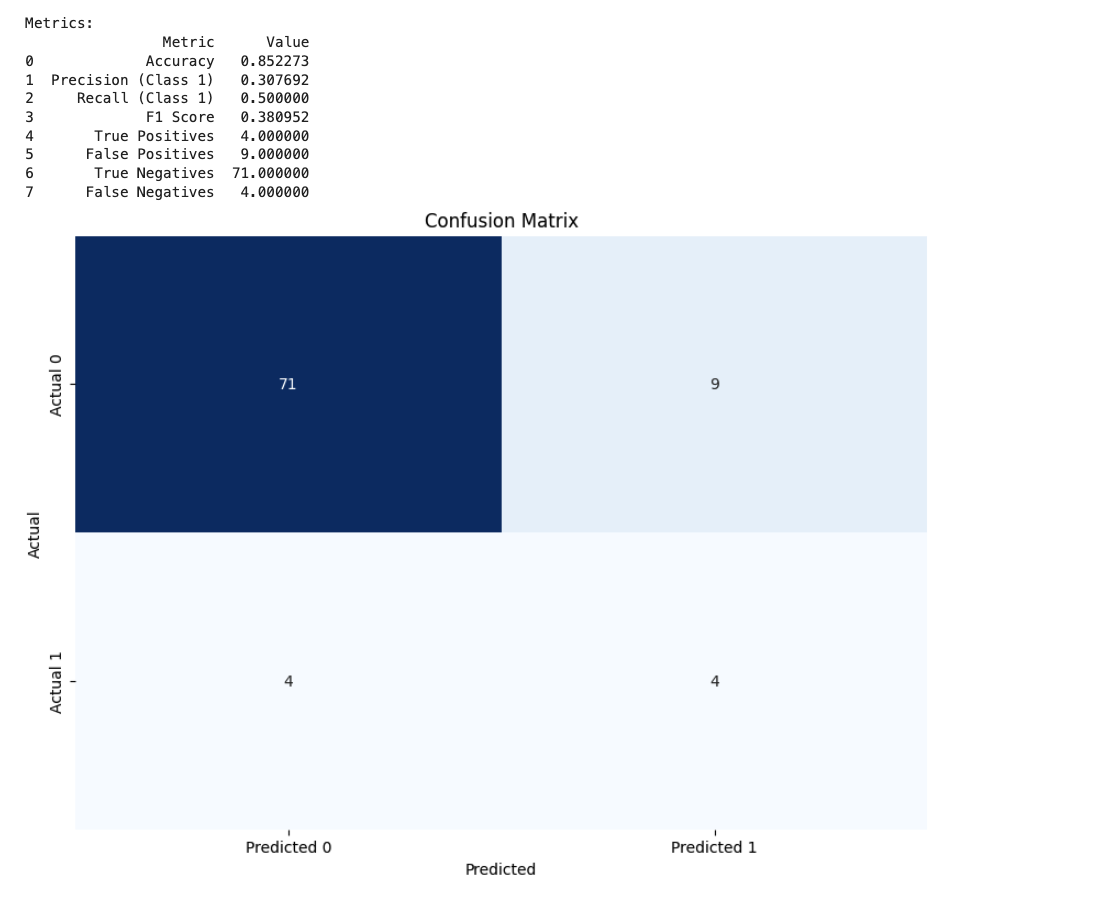

---

# <font color = red> Template Prep
## <font color = blue> Generate Scenarios
### <font color = green> Dry Run - Sample for Validation

---

# <font color = green>Generate some credible samples that can be used for templates

In [5]:
import requests
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from datetime import datetime
import re
import os
import random

# Parameters
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'
save_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates'
file_prefix = "06.20240714_062624_non_overlap_full_test"

# Define the number of records for each test run (input_length + gap + prediction_period)
num_records_per_test = lambda input_length, gap, prediction_period: input_length + gap + prediction_period

# Load the test data
X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# Load the original parquet file with sequence mapping
input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
original_df = pd.read_parquet(input_file)

# Ensure Seq_Num is integer for proper merging
original_df['Seq_Num'] = original_df['Seq_Num'].astype(int)

# Function to prepare data for the model
def prepare_data_for_model(X_test, start_seq_num, num_records_per_test, num_tests, original_df, max_events):
    start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
    end_index_x_test = min(start_index_x_test + num_tests, len(X_test))
    X_test_limited = X_test[start_index_x_test:end_index_x_test]
    X_test_limited = X_test_limited[:, :, 1:max_events + 16]
    X_test_tensor = torch.tensor(X_test_limited, dtype=torch.float32)
    return X_test_tensor, start_index_x_test, end_index_x_test

# Function to clean text
def clean_text(text):
    text = re.sub(r'<\*?>', '', text)
    text = text.replace('<', '').replace('>', '')
    return text

# Function to consolidate events and map to templates
def consolidate_events_to_text(df, start_col, end_col, col_name, master_tracking_df, eventid_to_template):
    consolidated = []
    for i, row in df.iterrows():
        seen_events = set()
        events = []
        for seq_num in range(row[start_col], row[end_col] + 1):
            if col_name in master_tracking_df.columns:
                event_list = master_tracking_df[master_tracking_df['Seq_Num'] == seq_num][col_name].astype(str).tolist()
                for event in event_list:
                    for e in event.split(', '):
                        if e not in seen_events:
                            seen_events.add(e)
                            if int(e) in eventid_to_template:
                                cleaned_text = clean_text(eventid_to_template[int(e)])
                                events.append(f'"{cleaned_text}"')
                            else:
                                events.append('"Unknown"')
        consolidated.append(', '.join(events))
    return consolidated

# Main function to run the experiment
def run_experiment(max_events, input_length, gap, prediction_period, start_time, num_tests):
    filtered_df = original_df[(original_df['Train_Test'] == 'Test') & (original_df['time_start'] == start_time)]
    if filtered_df.empty:
        start_date = pd.to_datetime(start_time).date()
        same_date_df = original_df[(original_df['Train_Test'] == 'Test') & (pd.to_datetime(original_df['time_start']).dt.date == start_date)]
        if not same_date_df.empty:
            available_times = same_date_df['time_start'].unique().tolist()
            print(f"Error: start_time {start_time} not found in the dataset. Available times on {start_date} are: {available_times}")
        all_times_df = original_df[original_df['Train_Test'] == 'Test'].copy()
        all_times_df['time_start'] = pd.to_datetime(all_times_df['time_start'])
        nearest_time = all_times_df.iloc[(all_times_df['time_start'] - pd.to_datetime(start_time)).abs().argsort()[:1]]['time_start'].values[0]
        print(f"Error: start_time {start_time} not found in the dataset. The nearest available time is: {nearest_time}")
        start_time = nearest_time  # Update the start_time to the nearest available time
        filtered_df = original_df[(original_df['Train_Test'] == 'Test') & (original_df['time_start'] == start_time)].copy()

    start_seq_num = int(filtered_df['Seq_Num'].values[0])
    max_end_seq_num = int(original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].max())
    expected_end_seq_num = start_seq_num + num_tests * num_records_per_test(input_length, gap, prediction_period) - 1

    if expected_end_seq_num > max_end_seq_num:
        max_allowed_runs = (max_end_seq_num - start_seq_num + 1) // num_records_per_test(input_length, gap, prediction_period)
        print(f"Number of test runs exceeds the maximum allowed ({max_allowed_runs}). Setting num_tests to {max_allowed_runs}.")
        num_tests = max_allowed_runs
        expected_end_seq_num = start_seq_num + num_tests * num_records_per_test(input_length, gap, prediction_period) - 1

    X_test_tensor, start_index_x_test, end_index_x_test = prepare_data_for_model(X_test, start_seq_num, num_records_per_test(input_length, gap, prediction_period), num_tests, original_df, max_events)

    print(f"X_test shape after adjusting columns: {X_test_tensor.shape}")

    data = {
        'X_test': X_test_tensor.tolist(),
        'input_length': input_length,
        'gap': gap,
        'prediction_period': prediction_period,
        'max_events': max_events
    }

    response = requests.post('http://0.0.0.0:5000/predict', json=data)

    print("Raw response text:", response.text)

    try:
        response_data = response.json()
    except ValueError as e:
        print("Failed to parse JSON response:", e)
        response_data = {}

    if 'predictions' in response_data:
        predictions = np.array(response_data['predictions']).flatten()
        model_name = response_data.get('model_name', 'unknown_model')

        num_predictions = len(predictions)
        num_tests = min(num_tests, num_predictions)  # Adjust num_tests to the number of predictions returned

        tracking_data = []

        for i in range(num_tests):
            total_seq_start = start_seq_num + i * num_records_per_test(input_length, gap, prediction_period)
            total_seq_end = total_seq_start + num_records_per_test(input_length, gap, prediction_period) - 1
            source_seq_start = total_seq_start
            source_seq_end = source_seq_start + input_length - 1
            gap_seq_start = source_seq_end + 1
            gap_seq_end = gap_seq_start + gap - 1
            prediction_seq_start = total_seq_end - prediction_period + 1
            prediction_seq_end = total_seq_end
            
            tracking_data.append([
                total_seq_start, total_seq_end, source_seq_start, source_seq_end,
                gap_seq_start, gap_seq_end, prediction_seq_start, prediction_seq_end,
                predictions[i], y_test[start_index_x_test + i],
                str(original_df[original_df['Seq_Num'] == source_seq_start]['time_start'].values[0])
            ])

        tracking_df = pd.DataFrame(tracking_data, columns=[
            "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
            "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
            "Predicted", "Actual", "time_start"
        ])

        conf_matrix = confusion_matrix(y_test[start_index_x_test:end_index_x_test], predictions, labels=[0, 1])
        precision = precision_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
        recall = recall_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
        accuracy = accuracy_score(y_test[start_index_x_test:end_index_x_test], predictions)
        f1 = f1_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)

        if conf_matrix.size == 4:
            tn, fp, fn, tp = conf_matrix.ravel()
        else:
            tn = conf_matrix[0, 0] if conf_matrix.shape[0] > 0 else 0
            fp = conf_matrix[0, 1] if conf_matrix.shape[1] > 1 else 0
            fn = conf_matrix[1, 0] if conf_matrix.shape[0] > 1 else 0
            tp = conf_matrix[1, 1] if conf_matrix.shape[1] > 1 else 0

        timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
        metrics_data = {
            'Experiment': [timestamp] * num_tests,
            'Sample': list(range(1, num_tests + 1)),
            'Max_Events': [max_events] * num_tests,
            'Input_Length': [input_length] * num_tests,
            'Gap': [gap] * num_tests,
            'Prediction_Period': [prediction_period] * num_tests,
            'Exp_Start_Time': [start_time] * num_tests,
            'Num_Tests': [num_tests] * num_tests,
            'Model_Name': [model_name] * num_tests,
            'Precision': [precision] * num_tests,
            'Recall': [recall] * num_tests,
            'Accuracy': [accuracy] * num_tests,
            'F1_Score': [f1] * num_tests,
            'TN': [tn] * num_tests,
            'FP': [fp] * num_tests,
            'FN': [fn] * num_tests,
            'TP': [tp] * num_tests
        }
        metrics_df = pd.DataFrame(metrics_data)

        combined_df = pd.concat([metrics_df, tracking_df], axis=1)

        master_tracking_file = f"{data_dir}/03B.20240716_072206_orig_parquet_mapper_agents.parquet"
        master_tracking_df = pd.read_parquet(master_tracking_file)

        merged_df = combined_df.merge(master_tracking_df, left_on='Source_Seq_Start', right_on='Seq_Num', how='left')

        merged_df.rename(columns={'time_start_y': 'Sample_Start_Time'}, inplace=True)

        columns_to_keep = [
            "Experiment", "Sample", "Max_Events", "Input_Length", "Gap", "Prediction_Period",
            "Exp_Start_Time", "Num_Tests", "Model_Name", "Precision", "Recall", "Accuracy", "F1_Score", "TN", "FP", "FN", "TP",
            "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End", "Gap_Seq_Start",
            "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End", "Predicted", "Actual", "Sample_Start_Time",
            "Class", "unique_events", "most_frequent_event", "transitions", "entropy", "hour_of_day", "day_of_week",
            "event_count", "top_event_frequency", "prev_event_count", "transition_rate", "high_transition_rate",
            "prev_entropy", "entropy_change", "rolling_event_count", "rolling_unique_event_count"
        ]

        missing_columns = [col for col in columns_to_keep if col not in merged_df.columns]
        if missing_columns:
            print(f"Warning: The following columns are missing from merged_df: {missing_columns}")

        columns_to_keep = [col if col != 'time_start' else 'Sample_Start_Time' for col in columns_to_keep]

        filtered_df = merged_df[columns_to_keep].copy()

        eventid_encoding_file = f"{data_dir}/08.20240716031626_event_ID_int_template_mapping.csv"
        eventid_encoding_df = pd.read_csv(eventid_encoding_file)

        eventid_to_template = dict(zip(eventid_encoding_df['EncodedValue'], eventid_encoding_df['EventTemplate']))

        filtered_df['runtime_most_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event', master_tracking_df, eventid_to_template)
        filtered_df['runtime_least_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event', master_tracking_df, eventid_to_template)

        final_file = f"{save_dir}/A-Template_Detail.parquet"

        filtered_df['Experiment'] = filtered_df['Experiment'].astype(int)
        filtered_df['Exp_Start_Time'] = filtered_df['Exp_Start_Time'].astype(str)  # Convert Exp_Start_Time to string
        
        if os.path.exists(final_file):
            existing_df = pd.read_parquet(final_file)
            combined_final_df = pd.concat([existing_df, filtered_df])
            combined_final_df.to_parquet(final_file, index=False)
        else:
            filtered_df.to_parquet(final_file, index=False)
        
        print(f"Final file with consolidated columns saved to: {final_file}")

        saved_results = pd.read_parquet(final_file)
        print("********************** Displaying the last 5 rows from the saved parquet file (Tail)  ******************************************")
        display(saved_results.tail(5))

    else:
        print("No predictions found in the response.")

# Define parameter ranges
max_events_list = [5, 10, 20, 30, 40]
input_length_list = [20, 30]
gap_list = [1, 2, 3, 4, 5]
prediction_period_list = [1]
start_times_list = pd.date_range(start='2005-11-08', end='2006-01-04').strftime('%Y-%m-%d %H:%M:%S').tolist()
num_tests_list = list(range(10, 131))

# Generate 5 random parameter combinations
random_combinations = random.sample([
    (max_events, input_length, gap, prediction_period, start_time, num_tests)
    for max_events in max_events_list
    for input_length in input_length_list
    for gap in gap_list
    for prediction_period in prediction_period_list
    for start_time in start_times_list
    for num_tests in num_tests_list
], 10)

# Run the experiments
for combination in random_combinations:
    max_events, input_length, gap, prediction_period, start_time, num_tests = combination
    print(f"Running experiment with parameters: max_events={max_events}, input_length={input_length}, gap={gap}, prediction_period={prediction_period}, start_time={start_time}, num_tests={num_tests}")
    run_experiment(max_events, input_length, gap, prediction_period, start_time, num_tests)

Running experiment with parameters: max_events=10, input_length=30, gap=4, prediction_period=1, start_time=2005-11-14 00:00:00, num_tests=41
Error: start_time 2005-11-14 00:00:00 not found in the dataset. Available times on 2005-11-14 are: [Timestamp('2005-11-14 03:55:00'), Timestamp('2005-11-14 04:00:00'), Timestamp('2005-11-14 04:05:00'), Timestamp('2005-11-14 04:10:00'), Timestamp('2005-11-14 04:30:00'), Timestamp('2005-11-14 04:45:00'), Timestamp('2005-11-14 05:05:00'), Timestamp('2005-11-14 05:10:00'), Timestamp('2005-11-14 05:15:00'), Timestamp('2005-11-14 05:20:00'), Timestamp('2005-11-14 05:30:00'), Timestamp('2005-11-14 05:40:00'), Timestamp('2005-11-14 05:45:00'), Timestamp('2005-11-14 05:55:00'), Timestamp('2005-11-14 06:00:00'), Timestamp('2005-11-14 06:05:00'), Timestamp('2005-11-14 06:15:00'), Timestamp('2005-11-14 06:35:00'), Timestamp('2005-11-14 06:40:00'), Timestamp('2005-11-14 07:00:00'), Timestamp('2005-11-14 07:05:00'), Timestamp('2005-11-14 07:10:00'), Timestamp('

,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Exp_Start_Time,Num_Tests,Model_Name,Precision,Recall,Accuracy,F1_Score,TN,FP,FN,TP,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,Sample_Start_Time,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl_text,runtime_least_frequent_consl_text
2458,20240804084425,37,10,30,4,1,2005-11-13 21:15:00,41,20240712_Transformers_Non_Overlapping_run_57_of_180.pt,0.0,0.0,0.878049,0.0,36,0,5,0,13106,13140,13106,13135,13136,13139,13140,13140,0,0.0,2005-12-07 22:45:00,0,1,898,0,0.000000,22,2,4,35433,16.0,0.000000,0,0.908909,-0.908909,138.0,24.0,""" as part of Service Action "", ""Node card is not fully functional"", ""Node card VPD check: U node in processor card slot J do not match. VPD ecid found "", ""ciod: Error reading message prefix on CioStream socket to :, "", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", ""instruction cache parity error corrected"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", "" socket closed"", ""BGLMaster has been started: ./BGLMaster --consoleip --consoleport --configfile bglmaster.init --autorestart y --dbprofile /u/bgdbcli/sqllib/dbprofile --dbproperties db.properties"", ""Lustre mount FAILED : bglio : block_id : location"", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ciod: pollControlDescriptors: Detected the debugger died."", ""ciod: Error loading invalid or missing program image, No such file or directory""",""" as part of Service Action "", ""Node card is not fully functional"", ""Node card VPD check: U node in processor card slot J do not match. VPD ecid found "", ""ciod: Error reading message prefix on CioStream socket to :, "", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", ""instruction cache parity error corrected"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", "" socket closed"", ""BGLMaster has been started: ./BGLMaster --consoleip --consoleport --configfile bglmaster.init --autorestart y --dbprofile /u/bgdbcli/sqllib/dbprofile --dbproperties db.properties"", ""Lustre mount FAILED : bglio : block_id : location"", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ciod: pollControlDescriptors: Detected the debugger died."", ""ciod: Error loading invalid or missing program image, No such file or directory"""
2459,20240804084425,38,10,30,4,1,2005-11-13 21:15:00,41,20240712_Transformers_Non_Overlapping_run_57_of_180.pt,0.0,0.0,0.878049,0.0,36,0,5,0,13141,13175,13141,13170,13171,13174,13175,13175,0,0.0,2005-12-08 15:30:00,0,3,193,6,1.082196,15,3,8,35433,7.0,0.750000,1,1.351784,-0.269588,45.0,20.0,""" ddr error(s) detected and corrected on rank , symbol over seconds"", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", ""ciod: generated core files for program "", ""ciod: Error reading message prefix on CioStream socket to :, "", ""MidplaneSwitchController::receiveTrain() iap failed: R-M-L-U-A, ec"", "" as part of Service Action "", ""Node card VPD check: U node in processor card slot J do not match. VPD ecid found "", ""ciod: Error loading invalid or missing program image, No such file or directory"", ""external input interrupt (unit= bit=): number of corrected SRAM errors has exceeded threshold, suppressing further interrupts of same type"", "" error(s) (dcr ) detected and corrected over 

Running experiment with parameters: max_events=30, input_length=20, gap=4, prediction_period=1, start_time=2005-11-28 00:00:00, num_tests=106
Error: start_time 2005-11-28 00:00:00 not found in the dataset. Available times on 2005-11-28 are: [Timestamp('2005-11-28 02:50:00'), Timestamp('2005-11-28 03:40:00'), Timestamp('2005-11-28 04:45:00'), Timestamp('2005-11-28 07:50:00'), Timestamp('2005-11-28 08:15:00'), Timestamp('2005-11-28 08:20:00'), Timestamp('2005-11-28 09:35:00'), Timestamp('2005-11-28 09:45:00'), Timestamp('2005-11-28 09:55:00'), Timestamp('2005-11-28 10:00:00'), Timestamp('2005-11-28 10:50:00'), Timestamp('2005-11-28 10:55:00'), Timestamp('2005-11-28 11:00:00'), Timestamp('2005-11-28 11:05:00'), Timestamp('2005-11-28 11:15:00'), Timestamp('2005-11-28 11:20:00'), Timestamp('2005-11-28 11:25:00'), Timestamp('2005-11-28 11:30:00'), Timestamp('2005-11-28 11:40:00'), Timestamp('2005-11-28 12:45:00'), Timestamp('2005-11-28 12:55:00'), Timestamp('2005-11-28 13:30:00'), Timestamp(

,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Exp_Start_Time,Num_Tests,Model_Name,Precision,Recall,Accuracy,F1_Score,TN,FP,FN,TP,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,Sample_Start_Time,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl_text,runtime_least_frequent_consl_text
2538,20240804084429,76,30,20,4,1,2005-11-28 02:50:00,80,20240712_Transformers_Non_Overlapping_run_107_of_180.pt,0.5,0.666667,0.925,0.571429,70,4,2,4,14406,14430,14406,14425,14426,14429,14430,14430,1,0.0,2005-12-29 16:15:00,0,5,898,31,1.436552,16,3,47,35432,28.0,0.659574,1,0.598270,0.838283,101.0,17.0,""" as part of Service Action "", ""Node card is not fully functional"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""external input interrupt (unit= bit=): number of corrected SRAM errors has exceeded threshold, suppressing further interrupts of same type"", ""ddr: Suppressing further CE interrupts"", ""data cache parity error detected. attempting to correct"", ""ciod: Error reading message prefix on CioStream socket to :, "", "" error(s) (dcr ) detected and corrected over seconds"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ciod: generated core files for program "", ""instruction cache parity error corrected""",""" as part of Service Action "", ""Node card is not fully functional"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""external input interrupt (unit= bit=): number of corrected SRAM errors has exceeded threshold, suppressing further interrupts of same type"", ""ddr: Suppressing further CE interrupts"", ""data cache parity error detected. attempting to correct"", ""ciod: Error reading message prefix on CioStream socket to :, "", "" error(s) (dcr ) detected and corrected over seconds"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ciod: generated core files for program "", ""instruction cache parity error corrected"""
2539,20240804084429,77,30,20,4,1,2005-11-28 02:50:00,80,20240712_Transformers_Non_Overlapping_run_107_of_180.pt,0.5,0.666667,0.925,0.571429,70,4,2,4,14431,14455,14431,14450,14451,14454,14455,14455,0,0.0,2005-12-31 14:15:00,0,2,976,1,0.693147,14,5,2,35433,67.0,0.500000,0,1.350037,-0.656890,157.0,21.0,"""ddr: activating redundant bit steering for next allocation: rank= symbol="", "" error(s) (dcr ) detected and corrected over seconds"", ""data cache parity error detected. attempting to correct"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""instruction cache parity error corrected"", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ciod: Error loading invalid or missing program image, No such file or directory"", ""ciod: generated core files for program ""","""ddr: activating redundant bit steering for next allocation: rank= symbol="", "" error(s) (dcr ) detected and corrected over seconds"", ""data cache parity error detected. attempting to correct"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""instruction cache parity error corrected"", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ciod: Error loading invalid or missing program image, No such file or directory"", ""ciod: generated core files for program """
2540,20240804084429,78,30,20,4,1,2005-11-28 02:50:00,80,20240712_Transformers_Non_Overlapping_run_107_of_180.pt,0.5,0.666667,0.925,0.571429,70,4,2,4,14456,14480,14456,14475

Running experiment with parameters: max_events=30, input_length=20, gap=2, prediction_period=1, start_time=2005-11-27 00:00:00, num_tests=107
Error: start_time 2005-11-27 00:00:00 not found in the dataset. Available times on 2005-11-27 are: [Timestamp('2005-11-27 04:55:00'), Timestamp('2005-11-27 05:35:00'), Timestamp('2005-11-27 05:40:00'), Timestamp('2005-11-27 08:35:00'), Timestamp('2005-11-27 15:15:00'), Timestamp('2005-11-27 15:45:00'), Timestamp('2005-11-27 19:45:00'), Timestamp('2005-11-27 19:50:00'), Timestamp('2005-11-27 20:00:00'), Timestamp('2005-11-27 20:05:00')]
Error: start_time 2005-11-27 00:00:00 not found in the dataset. The nearest available time is: 2005-11-26T23:45:00.000000000
Number of test runs exceeds the maximum allowed (87). Setting num_tests to 87.
X_test shape after adjusting columns: torch.Size([87, 20, 45])
Raw response text: {"model_name":"20240712_Transformers_Non_Overlapping_run_103_of_180.pt","predictions":[0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0

,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Exp_Start_Time,Num_Tests,Model_Name,Precision,Recall,Accuracy,F1_Score,TN,FP,FN,TP,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,Sample_Start_Time,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl_text,runtime_least_frequent_consl_text
2625,20240804084433,83,30,20,2,1,2005-11-26 23:45:00,87,20240712_Transformers_Non_Overlapping_run_103_of_180.pt,0.133333,0.5,0.827586,0.210526,70,13,2,2,14406,14428,14406,14425,14426,14427,14428,14428,0,0.0,2005-12-29 16:15:00,0,5,898,31,1.436552,16,3,47,35432,28.0,0.659574,1,0.598270,0.838283,101.0,17.0,""" as part of Service Action "", ""Node card is not fully functional"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""external input interrupt (unit= bit=): number of corrected SRAM errors has exceeded threshold, suppressing further interrupts of same type"", ""ddr: Suppressing further CE interrupts"", ""data cache parity error detected. attempting to correct"", ""ciod: Error reading message prefix on CioStream socket to :, "", "" error(s) (dcr ) detected and corrected over seconds"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ciod: generated core files for program "", ""instruction cache parity error corrected""",""" as part of Service Action "", ""Node card is not fully functional"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""external input interrupt (unit= bit=): number of corrected SRAM errors has exceeded threshold, suppressing further interrupts of same type"", ""ddr: Suppressing further CE interrupts"", ""data cache parity error detected. attempting to correct"", ""ciod: Error reading message prefix on CioStream socket to :, "", "" error(s) (dcr ) detected and corrected over seconds"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ciod: generated core files for program "", ""instruction cache parity error corrected"""
2626,20240804084433,84,30,20,2,1,2005-11-26 23:45:00,87,20240712_Transformers_Non_Overlapping_run_103_of_180.pt,0.133333,0.5,0.827586,0.210526,70,13,2,2,14429,14451,14429,14448,14449,14450,14451,14451,0,0.0,2005-12-31 11:50:00,0,5,193,75,1.260599,11,5,85,35430,1.0,0.882353,1,0.000000,1.260599,190.0,20.0,""" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", "" error(s) (dcr ) detected and corrected over seconds"", ""data cache parity error detected. attempting to correct"", ""instruction cache parity error corrected"", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ciod: Error loading invalid or missing program image, No such file or directory"", ""ciod: generated core files for program """,""" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", "" error(s) (dcr ) detected and corrected over seconds"", ""data cache parity error detected. attempting to correct"", ""instruction cache parity error corrected"", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ciod: Error loading invalid or missing program image, No such file or directory"", ""ciod: generated core files for program """
2627,20240804084433,85,30,20,2,1,2005-11-26 23:45:00,87,20240712_Transformers_Non_Overlapping_run_103_of_180.pt,0.133333,0.5,0.827586,0.210526,70,13,2,2,14452,14474

Running experiment with parameters: max_events=20, input_length=30, gap=3, prediction_period=1, start_time=2005-12-27 00:00:00, num_tests=89
Number of test runs exceeds the maximum allowed (8). Setting num_tests to 8.
X_test shape after adjusting columns: torch.Size([8, 20, 35])
Raw response text: {"model_name":"20240712_Transformers_Non_Overlapping_run_85_of_180.pt","predictions":[0,0,1,0,0,0,1,1]}

Final file with consolidated columns saved to: /home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates/A-Template_Detail.parquet
********************** Displaying the last 5 rows from the saved parquet file (Tail)  ******************************************


,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Exp_Start_Time,Num_Tests,Model_Name,Precision,Recall,Accuracy,F1_Score,TN,FP,FN,TP,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,Sample_Start_Time,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl_text,runtime_least_frequent_consl_text
2633,20240804084436,4,20,30,3,1,2005-12-27 00:00:00,8,20240712_Transformers_Non_Overlapping_run_85_of_180.pt,0.333333,1.0,0.75,0.5,5,2,0,1,14362,14395,14362,14391,14392,14394,14395,14395,0,0.0,2005-12-28 02:00:00,0,3,236,2,1.098612,2,2,3,35433,97.0,0.666667,1,1.639650,-0.541037,111.0,22.0,"""ddr: Suppressing further CE interrupts"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", ""ciod: generated core files for program "", ""ciod: Error reading message prefix on CioStream socket to :, "", "" error(s) (dcr ) detected and corrected over seconds"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ciod: Error loading invalid or missing program image, No such file or directory"", ""external input interrupt (unit= bit=): number of corrected SRAM errors has exceeded threshold, suppressing further interrupts of same type"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""data cache parity error detected. attempting to correct""","""ddr: Suppressing further CE interrupts"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", ""ciod: generated core files for program "", ""ciod: Error reading message prefix on CioStream socket to :, "", "" error(s) (dcr ) detected and corrected over seconds"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ciod: Error loading invalid or missing program image, No such file or directory"", ""external input interrupt (unit= bit=): number of corrected SRAM errors has exceeded threshold, suppressing further interrupts of same type"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""data cache parity error detected. attempting to correct"""
2634,20240804084436,5,20,30,3,1,2005-12-27 00:00:00,8,20240712_Transformers_Non_Overlapping_run_85_of_180.pt,0.333333,1.0,0.75,0.5,5,2,0,1,14396,14429,14396,14425,14426,14428,14429,14429,0,0.0,2005-12-29 10:45:00,0,1,228,0,0.000000,10,3,1,35433,1.0,0.000000,0,0.000000,0.000000,128.0,16.0,"""instruction cache parity error corrected"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""external input interrupt (unit= bit=): number of corrected SRAM errors has exceeded threshold, suppressing further interrupts of same type"", ""data cache parity error detected. attempting to correct"", ""Starting SystemController"", ""PrepareForService is being done on this Midplane (mLctn(R-M), by "", "" as part of Service Action "", ""Ido chip status changed: ip= v= t= status=M "", ""Node card is not fully functional"", ""ddr: Suppressing further CE interrupts"", ""ciod: Error reading message prefix on CioStream socket to :, "", "" error(s) (dcr ) detected and corrected over seconds"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ciod: generated core files for program ""","""instruction cache parity error corrected"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""external input interrupt (unit= bit=): number of corrected SRAM errors has exceeded threshold, suppressing further interrupts of same type"", ""data cache parity error detected. attempting to correct"", ""Starting SystemController"", ""PrepareForService is being done on this Midplane (mLctn(R-M), by "", "" as part of Service Action "", ""Ido chip st

Running experiment with parameters: max_events=20, input_length=20, gap=1, prediction_period=1, start_time=2005-12-02 00:00:00, num_tests=52
Error: start_time 2005-12-02 00:00:00 not found in the dataset. Available times on 2005-12-02 are: [Timestamp('2005-12-02 01:45:00'), Timestamp('2005-12-02 01:50:00'), Timestamp('2005-12-02 04:25:00'), Timestamp('2005-12-02 04:40:00'), Timestamp('2005-12-02 07:45:00'), Timestamp('2005-12-02 07:50:00'), Timestamp('2005-12-02 09:15:00'), Timestamp('2005-12-02 09:20:00'), Timestamp('2005-12-02 09:30:00'), Timestamp('2005-12-02 09:45:00'), Timestamp('2005-12-02 09:50:00'), Timestamp('2005-12-02 10:00:00'), Timestamp('2005-12-02 12:30:00'), Timestamp('2005-12-02 12:35:00'), Timestamp('2005-12-02 13:00:00'), Timestamp('2005-12-02 14:05:00'), Timestamp('2005-12-02 14:25:00'), Timestamp('2005-12-02 14:40:00'), Timestamp('2005-12-02 14:45:00'), Timestamp('2005-12-02 15:00:00'), Timestamp('2005-12-02 15:15:00'), Timestamp('2005-12-02 15:20:00'), Timestamp('

,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Exp_Start_Time,Num_Tests,Model_Name,Precision,Recall,Accuracy,F1_Score,TN,FP,FN,TP,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,Sample_Start_Time,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl_text,runtime_least_frequent_consl_text
2685,20240804084438,48,20,20,1,1,2005-12-02 01:45:00,52,20240712_Transformers_Non_Overlapping_run_71_of_180.pt,0.0,0.0,0.942308,0.0,49,0,3,0,13789,13810,13789,13808,13809,13809,13810,13810,0,0.0,2005-12-16 16:40:00,0,2,193,1,0.693147,16,4,2,35433,5.0,0.500000,0,1.054920,-0.361773,22.0,17.0,""" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ciod: pollControlDescriptors: Detected the debugger died."", ""ciod: Error reading message prefix on CioStream socket to :, "", ""ciod: generated core files for program "", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ddr: activating redundant bit steering for next allocation: rank= symbol=""",""" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ciod: pollControlDescriptors: Detected the debugger died."", ""ciod: Error reading message prefix on CioStream socket to :, "", ""ciod: generated core files for program "", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="""
2686,20240804084438,49,20,20,1,1,2005-12-02 01:45:00,52,20240712_Transformers_Non_Overlapping_run_71_of_180.pt,0.0,0.0,0.942308,0.0,49,0,3,0,13811,13832,13811,13830,13831,13831,13832,13832,0,0.0,2005-12-17 15:20:00,0,5,193,29,1.405348,15,5,34,35431,2.0,0.852941,1,0.000000,1.405348,45.0,19.0,""" ddr error(s) detected and corrected on rank , symbol over seconds"", "" error(s) (dcr ) detected and corrected over seconds"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ddr: Suppressing further CE interrupts"", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds""",""" ddr error(s) detected and corrected on rank , symbol over seconds"", "" error(s) (dcr ) detected and corrected over seconds"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ddr: Suppressing further CE interrupts"", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds"""
2687,20240804084438,50,20,20,1,1,2005-12-02 01:45:00,52,20240712_Transformers_Non_Overlapping_run_71_of_180.pt,0.0,0.0,0.942308,0.0,49,0,3,0,13833,13854,13833,13852,13853,13853,13854,13854,0,0.0,2005-12-17 23:15:00,0,5,193,85,1.326255,23,5,99,35427,122.0,0.858586,1,1.180301,0.145954,230.0,22.0,""" ddr error(s) detected and corrected on rank , symbol over seconds"", "" error(s) (dcr ) detected and corrected over seconds"", ""ciod: generated core files for program "", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", ""ciod: Error loading program image too big, "", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ciod: Error reading message prefix on CioStream socket to :, """,""" ddr error(s) detected and corrected on rank , symbol over seconds"", "" error(s) (dcr ) detected and corrected over seconds"", ""ciod: generated core files for program "", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", ""ciod: Error loading program image too big, "", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ciod: Erro

Running experiment with parameters: max_events=40, input_length=20, gap=5, prediction_period=1, start_time=2006-01-01 00:00:00, num_tests=128
Error: start_time 2006-01-01 00:00:00 not found in the dataset. Available times on 2006-01-01 are: [Timestamp('2006-01-01 07:05:00'), Timestamp('2006-01-01 07:45:00'), Timestamp('2006-01-01 08:00:00'), Timestamp('2006-01-01 08:10:00'), Timestamp('2006-01-01 08:20:00'), Timestamp('2006-01-01 08:25:00'), Timestamp('2006-01-01 08:30:00'), Timestamp('2006-01-01 15:30:00'), Timestamp('2006-01-01 18:35:00'), Timestamp('2006-01-01 21:20:00'), Timestamp('2006-01-01 23:50:00')]
Error: start_time 2006-01-01 00:00:00 not found in the dataset. The nearest available time is: 2005-12-31T22:40:00.000000000
Number of test runs exceeds the maximum allowed (3). Setting num_tests to 3.
X_test shape after adjusting columns: torch.Size([3, 20, 55])
Raw response text: {"model_name":"20240712_Transformers_Non_Overlapping_run_139_of_180.pt","predictions":[0,0,0]}

Final

,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Exp_Start_Time,Num_Tests,Model_Name,Precision,Recall,Accuracy,F1_Score,TN,FP,FN,TP,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,Sample_Start_Time,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl_text,runtime_least_frequent_consl_text
2688,20240804084438,51,20,20,1,1,2005-12-02 01:45:00,52,20240712_Transformers_Non_Overlapping_run_71_of_180.pt,0.0,0.0,0.942308,0.0,49,0,3,0,13855,13876,13855,13874,13875,13875,13876,13876,0,0.0,2005-12-18 12:30:00,1,2,561,1,0.007738,12,6,1025,35433,6.0,0.000976,0,0.693147,-0.685409,1109.0,22.0,"""ciod: Error reading message prefix on CioStream socket to :, "", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""instruction cache parity error corrected"", ""total of ddr error(s) detected and corrected over seconds""","""ciod: Error reading message prefix on CioStream socket to :, "", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""instruction cache parity error corrected"", ""total of ddr error(s) detected and corrected over seconds"""
2689,20240804084438,52,20,20,1,1,2005-12-02 01:45:00,52,20240712_Transformers_Non_Overlapping_run_71_of_180.pt,0.0,0.0,0.942308,0.0,49,0,3,0,13877,13898,13877,13896,13897,13897,13898,13898,0,0.0,2005-12-18 21:35:00,0,2,976,1,0.693147,21,6,2,35433,255.0,0.500000,0,1.308494,-0.615346,260.0,16.0,"""ddr: activating redundant bit steering for next allocation: rank= symbol="", ""instruction cache parity error corrected"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""external input interrupt (unit= bit=): number of corrected SRAM errors has exceeded threshold, suppressing further interrupts of same type"", ""ddr: Suppressing further CE interrupts"", ""data cache parity error detected. attempting to correct"", ""ciod: Error reading message prefix on CioStream socket to :, "", ""total of ddr error(s) detected and corrected over seconds""","""ddr: activating redundant bit steering for next allocation: rank= symbol="", ""instruction cache parity error corrected"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""external input interrupt (unit= bit=): number of corrected SRAM errors has exceeded threshold, suppressing further interrupts of same type"", ""ddr: Suppressing further CE interrupts"", ""data cache parity error detected. attempting to correct"", ""ciod: Error reading message prefix on CioStream socket to :, "", ""total of ddr error(s) detected and corrected over seconds"""
2690,20240804084442,1,40,20,5,1,2005-12-31 22:40:00,3,20240712_Transformers_Non_Overlapping_run_139_of_180.pt,0.0,0.0,1.000000,0.0,3,0,0,0,14437,14462,14437,14456,14457,14461,14462,14462,0,0.0,2005-12-31 22:40:00,0,6,647,28,1.692158,22,5,42,35425,58.0,0.666667,1,1.143510,0.548648,104.0,20.0,""" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""instruction cache parity error corrected"", "" error(s) (dcr ) detected and corrected over seconds"", ""ciod: Error loading invalid or missing program image, No such file or directory"", ""ciod: generated core files for program "", ""data cache parity error detected. attempting to correct""",""" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", "" torus

Running experiment with parameters: max_events=5, input_length=20, gap=4, prediction_period=1, start_time=2005-11-16 00:00:00, num_tests=94
Error: start_time 2005-11-16 00:00:00 not found in the dataset. Available times on 2005-11-16 are: [Timestamp('2005-11-16 03:55:00'), Timestamp('2005-11-16 04:25:00'), Timestamp('2005-11-16 04:35:00'), Timestamp('2005-11-16 04:40:00'), Timestamp('2005-11-16 06:50:00'), Timestamp('2005-11-16 07:00:00'), Timestamp('2005-11-16 07:15:00'), Timestamp('2005-11-16 07:20:00'), Timestamp('2005-11-16 07:25:00'), Timestamp('2005-11-16 08:10:00'), Timestamp('2005-11-16 09:10:00'), Timestamp('2005-11-16 09:20:00'), Timestamp('2005-11-16 09:45:00'), Timestamp('2005-11-16 10:55:00'), Timestamp('2005-11-16 11:25:00'), Timestamp('2005-11-16 11:30:00'), Timestamp('2005-11-16 12:00:00'), Timestamp('2005-11-16 12:10:00'), Timestamp('2005-11-16 12:20:00'), Timestamp('2005-11-16 12:25:00'), Timestamp('2005-11-16 12:35:00'), Timestamp('2005-11-16 12:40:00'), Timestamp('2

,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Exp_Start_Time,Num_Tests,Model_Name,Precision,Recall,Accuracy,F1_Score,TN,FP,FN,TP,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,Sample_Start_Time,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl_text,runtime_least_frequent_consl_text
2782,20240804084444,90,5,20,4,1,2005-11-15 23:50:00,94,20240712_Transformers_Non_Overlapping_run_17_of_180.pt,0.0,0.0,0.904255,0.0,85,0,9,0,14217,14241,14217,14236,14237,14240,14241,14241,0,0.0,2005-12-26 20:25:00,0,1,228,0,0.0,20,0,188,35433,232.0,0.0,0,0.0,0.0,1004.0,12.0,"""instruction cache parity error corrected""","""instruction cache parity error corrected"""
2783,20240804084444,91,5,20,4,1,2005-11-15 23:50:00,94,20240712_Transformers_Non_Overlapping_run_17_of_180.pt,0.0,0.0,0.904255,0.0,85,0,9,0,14242,14266,14242,14261,14262,14265,14266,14266,0,0.0,2005-12-26 22:30:00,0,1,228,0,0.0,22,0,192,35433,85.0,0.0,0,0.0,0.0,886.0,10.0,"""instruction cache parity error corrected""","""instruction cache parity error corrected"""
2784,20240804084444,92,5,20,4,1,2005-11-15 23:50:00,94,20240712_Transformers_Non_Overlapping_run_17_of_180.pt,0.0,0.0,0.904255,0.0,85,0,9,0,14267,14291,14267,14286,14287,14290,14291,14291,0,0.0,2005-12-27 00:35:00,0,1,228,0,0.0,0,1,213,35433,197.0,0.0,0,0.0,0.0,1058.0,10.0,"""instruction cache parity error corrected""","""instruction cache parity error corrected"""
2785,20240804084444,93,5,20,4,1,2005-11-15 23:50:00,94,20240712_Transformers_Non_Overlapping_run_17_of_180.pt,0.0,0.0,0.904255,0.0,85,0,9,0,14292,14316,14292,14311,14312,14315,14316,14316,0,0.0,2005-12-27 02:35:00,0,1,228,0,0.0,2,1,183,35433,162.0,0.0,0,0.0,0.0,955.0,10.0,"""instruction cache parity error corrected""","""instruction cache parity error corrected"""
2786,20240804084444,94,5,20,4,1,2005-11-15 23:50:00,94,20240712_Transformers_Non_Overlapping_run_17_of_180.pt,0.0,0.0,0.904255,0.0,85,0,9,0,14317,14341,14317,14336,14337,14340,14341,14341,0,0.0,2005-12-27 04:55:00,0,1,228,0,0.0,4,1,93,35433,51.0,0.0,0,0.0,0.0,254.0,10.0,"""instruction cache parity error corrected""","""instruction cache parity error corrected"""


Running experiment with parameters: max_events=40, input_length=20, gap=4, prediction_period=1, start_time=2005-12-01 00:00:00, num_tests=116
Error: start_time 2005-12-01 00:00:00 not found in the dataset. Available times on 2005-12-01 are: [Timestamp('2005-12-01 05:10:00'), Timestamp('2005-12-01 05:15:00'), Timestamp('2005-12-01 05:30:00'), Timestamp('2005-12-01 05:35:00'), Timestamp('2005-12-01 05:40:00'), Timestamp('2005-12-01 05:45:00'), Timestamp('2005-12-01 05:50:00'), Timestamp('2005-12-01 05:55:00'), Timestamp('2005-12-01 06:00:00'), Timestamp('2005-12-01 06:05:00'), Timestamp('2005-12-01 06:10:00'), Timestamp('2005-12-01 06:30:00'), Timestamp('2005-12-01 06:35:00'), Timestamp('2005-12-01 06:40:00'), Timestamp('2005-12-01 06:45:00'), Timestamp('2005-12-01 06:50:00'), Timestamp('2005-12-01 07:00:00'), Timestamp('2005-12-01 07:50:00'), Timestamp('2005-12-01 07:55:00'), Timestamp('2005-12-01 08:20:00'), Timestamp('2005-12-01 08:25:00'), Timestamp('2005-12-01 08:30:00'), Timestamp(

,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Exp_Start_Time,Num_Tests,Model_Name,Precision,Recall,Accuracy,F1_Score,TN,FP,FN,TP,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,Sample_Start_Time,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl_text,runtime_least_frequent_consl_text
2855,20240804084449,69,40,20,4,1,2005-11-30 23:50:00,73,20240712_Transformers_Non_Overlapping_run_137_of_180.pt,0.333333,0.25,0.931507,0.285714,67,2,3,1,14401,14425,14401,14420,14421,14424,14425,14425,1,0.0,2005-12-29 15:25:00,0,4,241,3,1.386294,15,3,4,35433,1.0,0.750000,1,0.000000,1.386294,120.0,19.0,"""Starting SystemController"", ""PrepareForService is being done on this Midplane (mLctn(R-M), by "", "" as part of Service Action "", ""Ido chip status changed: ip= v= t= status=M "", ""Node card is not fully functional"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""external input interrupt (unit= bit=): number of corrected SRAM errors has exceeded threshold, suppressing further interrupts of same type"", ""ddr: Suppressing further CE interrupts"", ""data cache parity error detected. attempting to correct"", ""ciod: Error reading message prefix on CioStream socket to :, "", "" error(s) (dcr ) detected and corrected over seconds"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ciod: generated core files for program ""","""Starting SystemController"", ""PrepareForService is being done on this Midplane (mLctn(R-M), by "", "" as part of Service Action "", ""Ido chip status changed: ip= v= t= status=M "", ""Node card is not fully functional"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""external input interrupt (unit= bit=): number of corrected SRAM errors has exceeded threshold, suppressing further interrupts of same type"", ""ddr: Suppressing further CE interrupts"", ""data cache parity error detected. attempting to correct"", ""ciod: Error reading message prefix on CioStream socket to :, "", "" error(s) (dcr ) detected and corrected over seconds"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ciod: generated core files for program """
2856,20240804084449,70,40,20,4,1,2005-11-30 23:50:00,73,20240712_Transformers_Non_Overlapping_run_137_of_180.pt,0.333333,0.25,0.931507,0.285714,67,2,3,1,14426,14450,14426,14445,14446,14449,14450,14450,0,0.0,2005-12-31 04:45:00,0,1,228,0,0.000000,4,5,1,35433,101.0,0.000000,0,1.455877,-1.455877,105.0,15.0,"""instruction cache parity error corrected"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", "" error(s) (dcr ) detected and corrected over seconds"", ""data cache parity error detected. attempting to correct"", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ciod: Error loading invalid or missing program image, No such file or directory""","""instruction cache parity error corrected"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", "" error(s) (dcr ) detected and corrected over seconds"", ""data cache parity error detected. attempting to correct"", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ciod: Error loading invalid or missing program image, No such file or directory"""
2857,20240804084449,71,40,20,4,1,2005-11-30 2

Running experiment with parameters: max_events=5, input_length=20, gap=5, prediction_period=1, start_time=2005-12-20 00:00:00, num_tests=93
Error: start_time 2005-12-20 00:00:00 not found in the dataset. Available times on 2005-12-20 are: [Timestamp('2005-12-20 01:30:00'), Timestamp('2005-12-20 04:55:00'), Timestamp('2005-12-20 07:25:00'), Timestamp('2005-12-20 07:40:00'), Timestamp('2005-12-20 07:55:00'), Timestamp('2005-12-20 08:05:00'), Timestamp('2005-12-20 08:10:00'), Timestamp('2005-12-20 08:15:00'), Timestamp('2005-12-20 09:00:00'), Timestamp('2005-12-20 09:05:00'), Timestamp('2005-12-20 09:10:00'), Timestamp('2005-12-20 09:15:00'), Timestamp('2005-12-20 09:20:00'), Timestamp('2005-12-20 09:30:00'), Timestamp('2005-12-20 09:40:00'), Timestamp('2005-12-20 10:05:00'), Timestamp('2005-12-20 11:25:00'), Timestamp('2005-12-20 11:40:00'), Timestamp('2005-12-20 11:55:00'), Timestamp('2005-12-20 12:00:00'), Timestamp('2005-12-20 12:05:00'), Timestamp('2005-12-20 12:15:00'), Timestamp('2

,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Exp_Start_Time,Num_Tests,Model_Name,Precision,Recall,Accuracy,F1_Score,TN,FP,FN,TP,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,Sample_Start_Time,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl_text,runtime_least_frequent_consl_text
2879,20240804084453,20,5,20,5,1,2005-12-20 01:30:00,24,20240712_Transformers_Non_Overlapping_run_19_of_180.pt,0.0,0.0,0.958333,0.0,23,0,1,0,14395,14420,14395,14414,14415,14419,14420,14420,0,0.0,2005-12-29 09:45:00,0,1,176,0,0.000000,9,3,1,35433,1.0,0.000000,0,0.000000,0.000000,143.0,17.0,"""job timed out. Block freed."", ""instruction cache parity error corrected"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""external input interrupt (unit= bit=): number of corrected SRAM errors has exceeded threshold, suppressing further interrupts of same type"", ""data cache parity error detected. attempting to correct"", ""Starting SystemController"", ""PrepareForService is being done on this Midplane (mLctn(R-M), by "", "" as part of Service Action "", ""Ido chip status changed: ip= v= t= status=M "", ""Node card is not fully functional"", ""ddr: Suppressing further CE interrupts"", ""ciod: Error reading message prefix on CioStream socket to :, ""","""job timed out. Block freed."", ""instruction cache parity error corrected"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""external input interrupt (unit= bit=): number of corrected SRAM errors has exceeded threshold, suppressing further interrupts of same type"", ""data cache parity error detected. attempting to correct"", ""Starting SystemController"", ""PrepareForService is being done on this Midplane (mLctn(R-M), by "", "" as part of Service Action "", ""Ido chip status changed: ip= v= t= status=M "", ""Node card is not fully functional"", ""ddr: Suppressing further CE interrupts"", ""ciod: Error reading message prefix on CioStream socket to :, """
2880,20240804084453,21,5,20,5,1,2005-12-20 01:30:00,24,20240712_Transformers_Non_Overlapping_run_19_of_180.pt,0.0,0.0,0.958333,0.0,23,0,1,0,14421,14446,14421,14440,14441,14445,14446,14446,0,0.0,2005-12-30 20:25:00,0,1,228,0,0.000000,20,4,1,35433,84.0,0.000000,0,1.601990,-1.601990,127.0,17.0,"""instruction cache parity error corrected"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", "" error(s) (dcr ) detected and corrected over seconds"", ""data cache parity error detected. attempting to correct"", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds""","""instruction cache parity error corrected"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", "" error(s) (dcr ) detected and corrected over seconds"", ""data cache parity error detected. attempting to correct"", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"""
2881,20240804084453,22,5,20,5,1,2005-12-20 01:30:00,24,20240712_Transformers_Non_Overlapping_run_19_of_180.pt,0.0,0.0,0.958333,0.0,23,0,1,0,14447,14472,14447,14466,14467,14471,14472,14472,0,0.0,2006-01-01 21:20:00,0,4,68,3,0.221683,21,6,134,35433,64.0,0.022388,0,0.000000,0.221683,312.0,21.0,"""ciod: generated core files for program "", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""data cache parity error detected. attempting t

Running experiment with parameters: max_events=10, input_length=20, gap=4, prediction_period=1, start_time=2005-12-25 00:00:00, num_tests=73
Error: start_time 2005-12-25 00:00:00 not found in the dataset. Available times on 2005-12-25 are: [Timestamp('2005-12-25 00:45:00'), Timestamp('2005-12-25 05:25:00'), Timestamp('2005-12-25 11:05:00'), Timestamp('2005-12-25 11:10:00'), Timestamp('2005-12-25 11:20:00'), Timestamp('2005-12-25 11:50:00'), Timestamp('2005-12-25 12:00:00'), Timestamp('2005-12-25 12:35:00'), Timestamp('2005-12-25 14:45:00'), Timestamp('2005-12-25 14:50:00'), Timestamp('2005-12-25 16:20:00'), Timestamp('2005-12-25 17:40:00'), Timestamp('2005-12-25 18:55:00'), Timestamp('2005-12-25 20:25:00'), Timestamp('2005-12-25 22:05:00'), Timestamp('2005-12-25 22:10:00'), Timestamp('2005-12-25 22:45:00')]
Error: start_time 2005-12-25 00:00:00 not found in the dataset. The nearest available time is: 2005-12-25T00:45:00.000000000
Number of test runs exceeds the maximum allowed (16). Se

,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Exp_Start_Time,Num_Tests,Model_Name,Precision,Recall,Accuracy,F1_Score,TN,FP,FN,TP,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,Sample_Start_Time,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl_text,runtime_least_frequent_consl_text
2895,20240804084455,12,10,20,4,1,2005-12-25 00:45:00,16,20240712_Transformers_Non_Overlapping_run_47_of_180.pt,0.0,0.0,0.9375,0.0,15,1,0,0,14392,14416,14392,14411,14412,14415,14416,14416,1,0.0,2005-12-28 23:15:00,0,7,193,103,1.663975,23,2,124,35412,16.0,0.830645,1,0.233792,1.430184,148.0,21.0,""" ddr error(s) detected and corrected on rank , symbol over seconds"", ""data cache parity error detected. attempting to correct"", ""instruction cache parity error corrected"", ""job timed out. Block freed."", ""external input interrupt (unit= bit=): number of corrected SRAM errors has exceeded threshold, suppressing further interrupts of same type"", ""Starting SystemController"", ""PrepareForService is being done on this Midplane (mLctn(R-M), by "", "" as part of Service Action "", ""Ido chip status changed: ip= v= t= status=M "", ""Node card is not fully functional"", ""ddr: Suppressing further CE interrupts""",""" ddr error(s) detected and corrected on rank , symbol over seconds"", ""data cache parity error detected. attempting to correct"", ""instruction cache parity error corrected"", ""job timed out. Block freed."", ""external input interrupt (unit= bit=): number of corrected SRAM errors has exceeded threshold, suppressing further interrupts of same type"", ""Starting SystemController"", ""PrepareForService is being done on this Midplane (mLctn(R-M), by "", "" as part of Service Action "", ""Ido chip status changed: ip= v= t= status=M "", ""Node card is not fully functional"", ""ddr: Suppressing further CE interrupts"""
2896,20240804084455,13,10,20,4,1,2005-12-25 00:45:00,16,20240712_Transformers_Non_Overlapping_run_47_of_180.pt,0.0,0.0,0.9375,0.0,15,1,0,0,14417,14441,14417,14436,14437,14440,14441,14441,0,0.0,2005-12-30 17:00:00,0,3,156,3,0.735622,17,4,8,35433,23.0,0.375000,0,1.609691,-0.874069,625.0,25.0,""" error(s) (dcr ) detected and corrected over seconds"", ""ciod: generated core files for program "", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""instruction cache parity error corrected"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", ""data cache parity error detected. attempting to correct""",""" error(s) (dcr ) detected and corrected over seconds"", ""ciod: generated core files for program "", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""instruction cache parity error corrected"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", ""data cache parity error detected. attempting to correct"""
2897,20240804084455,14,10,20,4,1,2005-12-25 00:45:00,16,20240712_Transformers_Non_Overlapping_run_47_of_180.pt,0.0,0.0,0.9375,0.0,15,1,0,0,14442,14466,14442,14461,14462,14465,14466,14466,0,0.0,2006-01-01 08:20:00,0,7,812,8,1.846220,8,6,11,35430,2.0,0.727273,1,0.000000,1.846220,157.0,26.0,""" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ciod: Error loading invalid or missing program image, No such file or directory"", ""ciod: generated core files for program "", ""data cache parity error detected. attempting to correct"", ""instruction cache parity error corrected""",""" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", "" ddr error(s) detected and corrected on rank , s

---
## Queries on the combination runs

In [6]:
import pandas as pd

# Load the consolidated DataFrame from the parquet file
final_file = f"{save_dir}/A-Template_Detail.parquet"
consolidated_df = pd.read_parquet(final_file)

# Display the entire dataframe (for debugging purpose)
# print(consolidated_df)

# Query the entries ordered by 'Experiment' and 'Sample' columns in descending order
def get_ordered_entries(df, n=5):
    # Ensure 'Experiment' column is treated as a string
    df['Experiment'] = df['Experiment'].astype(str)
    # Sort the DataFrame by 'Experiment' and 'Sample' in descending order
    df_sorted = df.sort_values(by=['Experiment', 'Sample'], ascending=[False, False])
    # Get the top n entries
    ordered_entries = df_sorted.head(n)
    return ordered_entries

# Get the top 5 entries ordered by 'Experiment' and 'Sample'
ordered_entries = get_ordered_entries(consolidated_df, n=5)
print("Top 5 Entries Ordered by 'Experiment' and 'Sample' in Descending Order:")
display(ordered_entries)


Top 5 Entries Ordered by 'Experiment' and 'Sample' in Descending Order:


,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Exp_Start_Time,Num_Tests,Model_Name,Precision,Recall,Accuracy,F1_Score,TN,FP,FN,TP,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,Sample_Start_Time,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl_text,runtime_least_frequent_consl_text
2899,20240804084455,16,10,20,4,1,2005-12-25 00:45:00,16,20240712_Transformers_Non_Overlapping_run_47_of_180.pt,0.0,0.0,0.9375,0.0,15,1,0,0,14492,14516,14492,14511,14512,14515,14516,14516,0,0.0,2006-01-03 10:50:00,0,4,193,13,1.366071,10,1,18,35433,14.0,0.722222,1,1.254042,0.112030,172.0,27.0,""" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ciod: Error reading message prefix on CioStream socket to :, "", ""Lustre mount FAILED : bglio : block_id : location"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", "" error(s) (dcr ) detected and corrected over seconds"", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", ""critical input interrupt (unit= bit=): warning for wire, suppressing further interrupts of same type""",""" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ciod: Error reading message prefix on CioStream socket to :, "", ""Lustre mount FAILED : bglio : block_id : location"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", "" error(s) (dcr ) detected and corrected over seconds"", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", ""critical input interrupt (unit= bit=): warning for wire, suppressing further interrupts of same type"""
2898,20240804084455,15,10,20,4,1,2005-12-25 00:45:00,16,20240712_Transformers_Non_Overlapping_run_47_of_180.pt,0.0,0.0,0.9375,0.0,15,1,0,0,14467,14491,14467,14486,14487,14490,14491,14491,0,0.0,2006-01-03 01:20:00,0,6,193,101,1.584366,1,1,121,35415,1.0,0.834711,1,0.000000,1.584366,530.0,25.0,""" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", ""r= r= r= r="", ""ciod: Error reading message prefix on CioStream socket to :, "", "" error(s) (dcr ) detected and corrected over seconds"", ""ciod: generated core files for program "", ""instruction cache parity error corrected""",""" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", ""r= r= r= r="", ""ciod: Error reading message prefix on CioStream socket to :, "", "" error(s) (dcr ) detected and corrected over seconds"", ""ciod: generated core files for program "", ""instruction cache parity error corrected"""
2897,20240804084455,14,10,20,4,1,2005-12-25 00:45:00,16,20240712_Transformers_Non_Overlapping_run_47_of_180.pt,0.0,0.0,0.9375,0.0,15,1,0,0,14442,14466,14442,14461,14462,14465,14466,14466,0,0.0,2006-01-01 08:20:00,0,7,812,8,1.846220,8,6,11,35430,2.0,0.727273,1,0.000000,1.846220,157.0,26.0,""" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ciod: Error loading invalid or missing program image, No such file or directory"", ""ciod: generated core files for program "", ""data cache parity error detected. attempting to correct"", ""instruction cache parity error corrected""",""" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ciod: Error loading invalid or missing program image, No such file or directory"", ""ciod: generated core files for program "", ""data cache parity error

In [7]:
import pandas as pd

# Load the consolidated DataFrame from the parquet file
final_file = f"{save_dir}/A-Template_Detail.parquet"
consolidated_df = pd.read_parquet(final_file)

# Convert 'Experiment' column to datetime
consolidated_df['Experiment'] = pd.to_datetime(consolidated_df['Experiment'], format='%Y%m%d%H%M%S')

# Count the number of distinct experiments
num_distinct_experiments = consolidated_df['Experiment'].nunique()

print(f"Number of distinct experiments in the full file: {num_distinct_experiments}")

Number of distinct experiments in the full file: 51


In [8]:
import pandas as pd

# Load the consolidated DataFrame from the parquet file
final_file = f"{save_dir}/A-Template_Detail.parquet"
consolidated_df = pd.read_parquet(final_file)

# Convert 'Experiment' column to datetime (if necessary)
consolidated_df['Experiment'] = pd.to_datetime(consolidated_df['Experiment'], format='%Y%m%d%H%M%S')

# Count the number of distinct model names
num_distinct_models = consolidated_df['Model_Name'].nunique()

print(f"Number of distinct model names in the full file: {num_distinct_models}")

Number of distinct model names in the full file: 22


---

# Validate the parquet file

In [9]:
# import pandas as pd

# # Path to the Parquet file
# file_path = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates/A-Template_Detail.parquet'

# # Load the Parquet file
# df = pd.read_parquet(file_path)

# # Display the contents of the Parquet file
# display(df.tail())

---
# <font color = red> Check Historical Weather Data

## <font color = orange> Read Converted Historical Data for BG/L Location (Livermore)

In [10]:
# import pandas as pd

# # Path to the Parquet file
# parquet_file_path = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/04.Local_Other_Files/20240803_Historical_Weather_94550/openweathermap_livermore.parquet'

# # Load the Parquet file
# df_weather_parquet = pd.read_parquet(parquet_file_path)

# # Display the head of the DataFrame
# display(df_weather_parquet.head())

---
# <font color = green> Plot Temperate and TP/FP

---

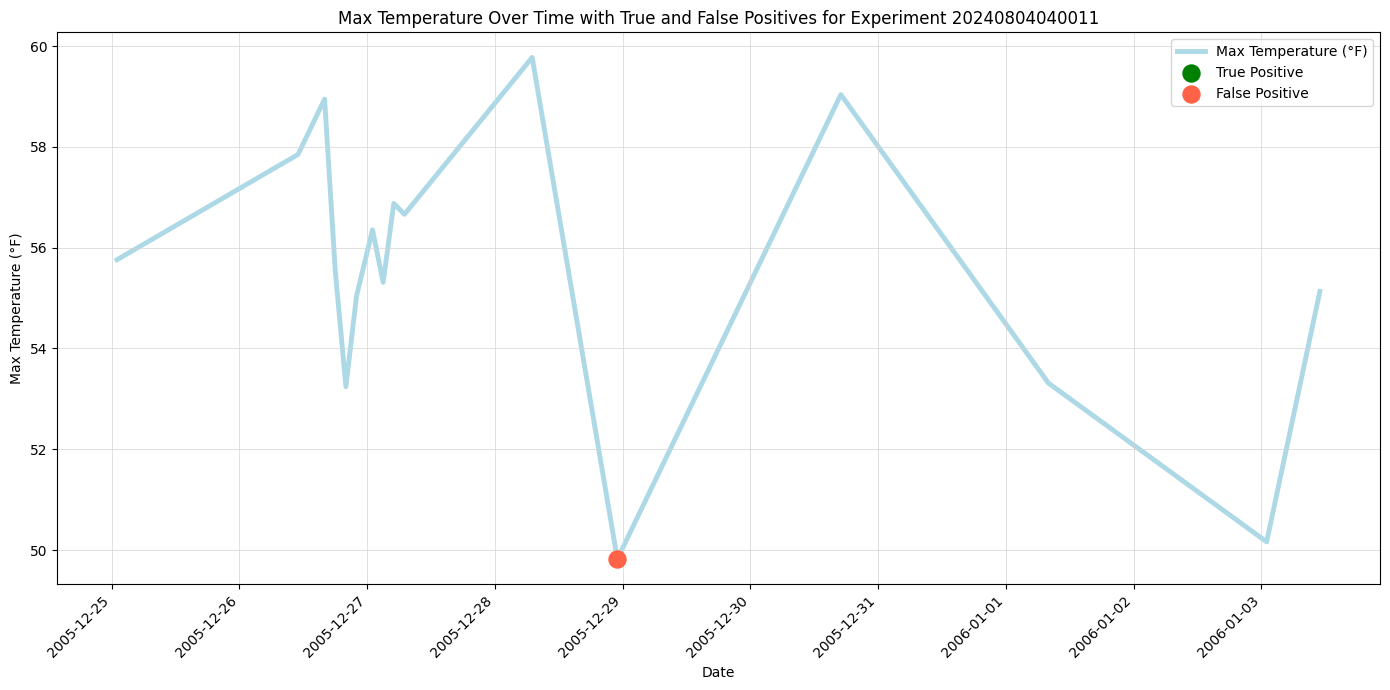

In [12]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# # Load the Parquet file for weather data
# parquet_file_path_weather = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/04.Local_Other_Files/20240803_Historical_Weather_94550/openweathermap_livermore.parquet'
# df_weather_parquet = pd.read_parquet(parquet_file_path_weather)

# # Load the Parquet file for experiment data
# file_path = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates/A-Template_Detail.parquet'
# df_experiment = pd.read_parquet(file_path)

# # Filter for the specific experiment
# experiment_id = 20240804084455
# df_experiment_filtered = df_experiment[df_experiment['Experiment'] == experiment_id].copy()

# # Focus on the relevant columns
# df_experiment_filtered = df_experiment_filtered[['Sample_Start_Time', 'Sample', 'Predicted', 'Actual']]

# # Convert Sample_Start_Time to datetime
# df_experiment_filtered['Sample_Start_Time'] = pd.to_datetime(df_experiment_filtered['Sample_Start_Time'])

# # Ensure 'Predicted' and 'Actual' columns are integers
# df_experiment_filtered['Predicted'] = df_experiment_filtered['Predicted'].astype(int)
# df_experiment_filtered['Actual'] = df_experiment_filtered['Actual'].astype(int)

# # Create a new column for categorizing TP and FP
# df_experiment_filtered['Category'] = 'Other'
# df_experiment_filtered.loc[(df_experiment_filtered['Predicted'] == 1) & (df_experiment_filtered['Actual'] == 1), 'Category'] = 'True Positive'
# df_experiment_filtered.loc[(df_experiment_filtered['Predicted'] == 1) & (df_experiment_filtered['Actual'] == 0), 'Category'] = 'False Positive'

# # Round Sample_Start_Time to the nearest hour
# df_experiment_filtered['Sample_Start_Time_Hour'] = df_experiment_filtered['Sample_Start_Time'].dt.round('h')

# # Ensure weather data is in the same timezone
# df_weather_parquet['gn_dt_pacific'] = pd.to_datetime(df_weather_parquet['gn_dt_pacific'], errors='coerce').dt.tz_localize(None).dt.round('h')

# # Print head of both DataFrames before merging
# # print("Experiment DataFrame head:")
# # # print(df_experiment_filtered.head())
# # # print("\nWeather DataFrame head:")
# # print(df_weather_parquet.head())

# # Merge the weather and experiment data on the date
# df_merged = pd.merge(df_weather_parquet, df_experiment_filtered, left_on='gn_dt_pacific', right_on='Sample_Start_Time_Hour', how='inner')

# # Check if the merged DataFrame is empty
# # print("\nMerged DataFrame head:")
# # print(df_merged.head())

# # Plotting
# if not df_merged.empty:
#     plt.figure(figsize=(14, 7))

#     # Line plot for temperature with thicker lines
#     plt.plot(df_merged['gn_dt_pacific'], df_merged['gn_temp_max'], label='Max Temperature (°F)', color='lightblue', linestyle='-', marker='', linewidth=3.5, zorder=1)

#     # Scatter plot for True Positives and False Positives
#     categories = ['True Positive', 'False Positive']
#     colors = {'True Positive': 'green', 'False Positive': 'tomato'}
#     sizes = {'True Positive': 150, 'False Positive': 150}  # Larger sizes for more visibility
#     opacities = {'True Positive': 1.0, 'False Positive': 1.0}  # Fully opaque

#     for category in categories:
#         subset = df_merged[df_merged['Category'] == category]
#         plt.scatter(subset['gn_dt_pacific'], subset['gn_temp_max'], label=category, color=colors[category], s=sizes[category], alpha=opacities[category], zorder=2)  # s for size, alpha for opacity

#     # Adding titles and labels
#     plt.title('Max Temperature Over Time with True and False Positives for Experiment 20240804040011')
#     plt.xlabel('Date')
#     plt.ylabel('Max Temperature (°F)')
#     plt.legend()

#     # Setting xticks for each day
#     plt.gca().xaxis.set_major_locator(mdates.DayLocator())
#     plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#     plt.xticks(rotation=45, ha='right')

#     # Light and almost invisible grid lines
#     plt.grid(True, which='both', color='lightgrey', linestyle='-', linewidth=0.5)

#     plt.tight_layout()

#     # Show plot
#     plt.show()
# else:
#     print("Merged DataFrame is empty. No data to plot.")
